<a href="https://colab.research.google.com/github/shivangi402/TED-Talks-Views-Prediction/blob/main/Individual_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : TED Talks Views Prediction  

##### **Project Type**    -Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Shivangi Singh


# **Project Summary -**
TED is a talk show that is organized by passionate individual who wants to uncover new ideas and share the latest research around the globe. The overall mission is to research and discover “ideas worth spreading.”
<br>
**Goal:** Predict the views of the videos uploaded on the TEDx website. The project is divided into a few categories:
<br>

**Data Preparation:** It includes observing your data which helps for further analysis.
<br>

**Data Analysis & Visualization:** It includes data cleaning, data wrangling, and finding some patterns through visualization techniques.
<br>

**Feature Selection:** Removing columns that are not necessary to find the target variable.
<br>

**Model Implementation:** Making models through linear regression, ridge regression, lasso regression, decision tree, random forest.

<br>

**Conclusion:** Finding the best model using the R2 score and other parameters.


# **GitHub Link -** https://github.com/shivangi402/TED-Talks-Views-Prediction

# **Problem Statement**
TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.

As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore , Jimmy Wales, Shahrukh Khan, and Bill Gates.

**The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

**Importing Libraries:**

In [ ]:
#Importing Necessary libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# For building pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

# **Know Your Data**

In [ ]:
#Importing Data
ted_df = pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

In [ ]:
#Observing Data
ted_df.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


**Feature Details:**
* **`talk_id:`** A unique identifier for each TED Talk video.

* **`title:`** The title of the talk.

* **`speaker_1:`** The primary speaker for the talk.

* **`all_speakers:`** A list of all the speakers for the talk.

* **`occupations:`** The occupations of the speakers.

* **`about_speakers:`** Information about the speakers, such as their backgrounds and expertise.

* **`views:`** The number of views the video has received.

* **`recorded_date:`** The date the talk was recorded.

* **`published_date:`** The date the talk was published on the TED Talks YouTube channel.

* **`event:`** The name of the TED event where the talk was given.

* **`native_lang:`** The language the talk was given in.

* **`available_lang:`** The languages the talk is available in.

* **`duration:`** The length of the video.(in sec.)

* **`topics:`** The topics covered in the talk.

* **`related talks:`** Other TED Talks that are related to this talk.

* **`url:`** The URL of the video.

* **`description:`** A brief description of the talk.

* **`transcript:`** A transcript of the talk.

### Dataset Information

In [ ]:
#Columns information
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

The datatpe for recorded_date, published_date and comments are incorrect.

#### Missing Values/Null Values

In [ ]:
#Check null values
ted_df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

occupation, about_speakers and comments has many null values. We will deal with null values later on.

#### Duplicate Values

In [ ]:
#Checking duplicated values
ted_df.duplicated().sum()

0

# **Understanding Your Variables**

### Check Unique Values for each variable.

In [ ]:
#Checking unique native language
ted_df['native_lang'].unique()

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

In [ ]:
#Describing the numerical data
ted_df.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


The minimum value for views and comments are zero.

# **Data Wrangling**

<b><u>**Data Cleaning**

In [ ]:
#Creating new dataframe
ted_newdf = ted_df.copy()

In [ ]:
#Filling missing values
values = {'comments':0, 'occupations':'none', 'about_speakers': 'none', 'all_speakers' : 'none'}
ted_newdf = ted_newdf.fillna(value=values)

In [ ]:
#Checking null values
ted_newdf.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     1
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [ ]:
#Changing datatypes of columns
ted_newdf = ted_newdf.astype({'comments': 'int32', 'views': 'int32', 'duration':'int32','talk_id':'int32'})
ted_newdf['recorded_date']= pd.to_datetime(ted_newdf['recorded_date'])
ted_newdf['published_date']= pd.to_datetime(ted_newdf['published_date'])

In [ ]:
ted_newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   talk_id         4005 non-null   int32         
 1   title           4005 non-null   object        
 2   speaker_1       4005 non-null   object        
 3   all_speakers    4005 non-null   object        
 4   occupations     4005 non-null   object        
 5   about_speakers  4005 non-null   object        
 6   views           4005 non-null   int32         
 7   recorded_date   4004 non-null   datetime64[ns]
 8   published_date  4005 non-null   datetime64[ns]
 9   event           4005 non-null   object        
 10  native_lang     4005 non-null   object        
 11  available_lang  4005 non-null   object        
 12  comments        4005 non-null   int32         
 13  duration        4005 non-null   int32         
 14  topics          4005 non-null   object        
 15  rela

In [ ]:
#Renaming speaker_1 column to speaker
ted_newdf.rename(columns = {'speaker_1': 'speaker'}, inplace=True)

In [ ]:
#Rows where views are 0
ted_newdf[ted_newdf['views']==0]

,talk_id,title,speaker,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",0,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",0,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw..."
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",0,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",0,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",0,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},none,none,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],0,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


**Observation:**
<br>
Total 6 rows have 0 views. This is somewhat impossible for ted talk show. So we will remove these rows as there might be some error during data entry.

In [ ]:
#Removing 0 view rows
ted_newdf = ted_newdf[ted_newdf['views']!=0]

### Dataset Rows & Columns count

In [ ]:
#Checking new size of data
ted_newdf.shape

(3999, 19)

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**<b><u>EDA and Feature Engineering**

**Comments**

<Axes: xlabel='comments', ylabel='Density'>

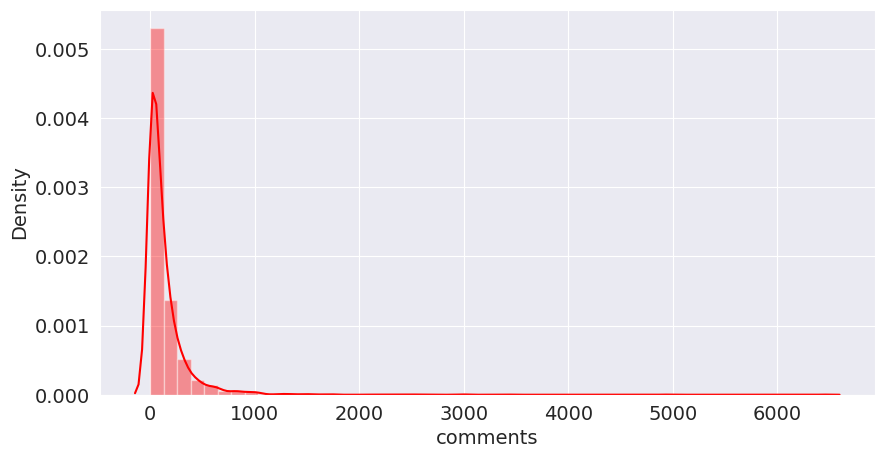

In [ ]:
#Distribution of comments column
plt.figure(figsize=(10,5))
sns.distplot(ted_newdf['comments'],color ='red')

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

#### 2. What is/are the insight(s) found from the chart?
Answer:
- Comments are highly right-skewed. We have to apply log transformation.
- There are some outliers in this column. We have to remove them wisely.
- We have to check null values and fill them too.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: Yes, comments can attract more views on the show.

In [ ]:
#Finding outliers count
print(len(ted_newdf[ted_newdf['comments'] > 1100]))

29


In [ ]:
#Removing outliers
ted_newdf.drop(ted_newdf[ted_newdf['comments'] > 1100].index, inplace=True)

In [ ]:
#Filling null values with median
ted_newdf['comments']= ted_newdf['comments'].replace(0, np.nan)
ted_newdf["comments"].fillna(ted_newdf["comments"].median(), axis = 0, inplace = True)

<Axes: xlabel='comments', ylabel='Density'>

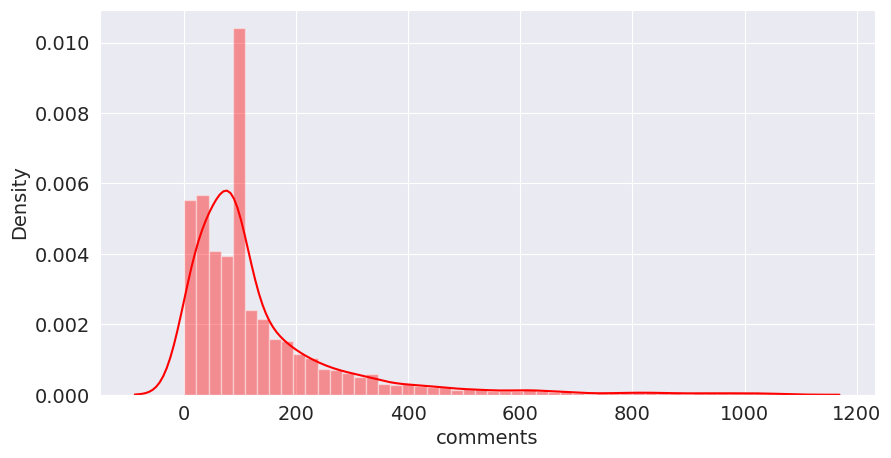

In [ ]:
#plotting distribution plot after modification
plt.figure(figsize=(10,5))
sns.distplot(ted_newdf['comments'],color ='red')

**Observation:**
<br>After removing outliers and filling null values, graph is right skewed. We will do log transformation in later stage.

**Duration**

<Axes: xlabel='duration', ylabel='Density'>

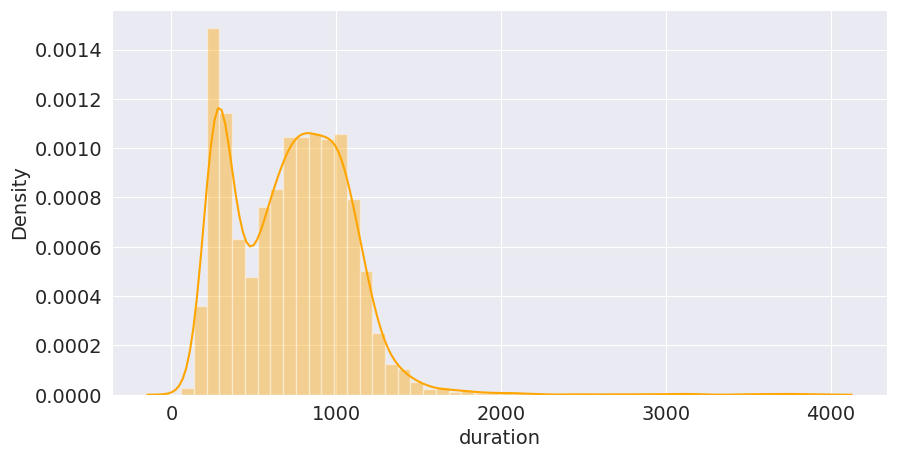

In [ ]:
#Checking distribution of duration column
plt.figure(figsize=(10,5))
sns.distplot(ted_newdf['duration'], color ='orange')

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

#### 2. What is/are the insight(s) found from the chart?
Answer:
- Bimodal type of graph
- Outliers present

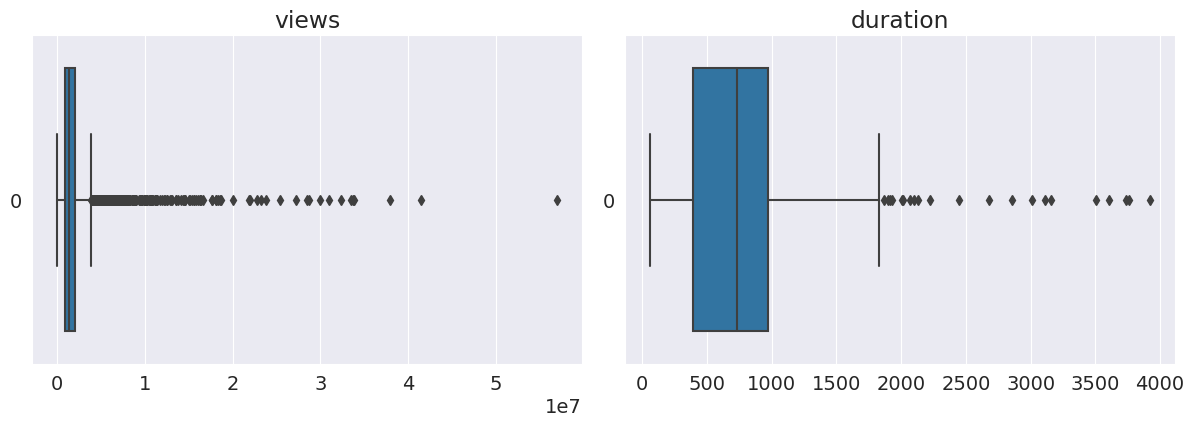

In [ ]:
# checking duration and views columns Outliers using boxplot

columns = ['views', 'duration']
plt.figure(figsize=(18,12))

for i, col in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(ted_newdf[col], orient ='h')
    plt.title(col)

plt.tight_layout()
  

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

#### 2. What is/are the insight(s) found from the chart?
Answer: Many outliers are present in both views and duration.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: Outliers can impact negative growth as it can affect the accuracy of the models and lead to incorrect predictions.

###  Handling Outliers

In [ ]:
#treatment of outliers by mean

columns = ['views', 'duration']

for col in columns:
    q1 = ted_newdf[col].quantile(0.25)
    q3 = ted_newdf[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    mean_val = ted_newdf[col].mean()
    ted_newdf[col] = ted_newdf[col].apply(lambda x: mean_val if x > upper_limit else x)

##### What all outlier treatment techniques have you used and why did you use those techniques?
Answer: We have used mean for outlier treatment as it will make no difference since the regression line will pass through the mean of your training data anyway.

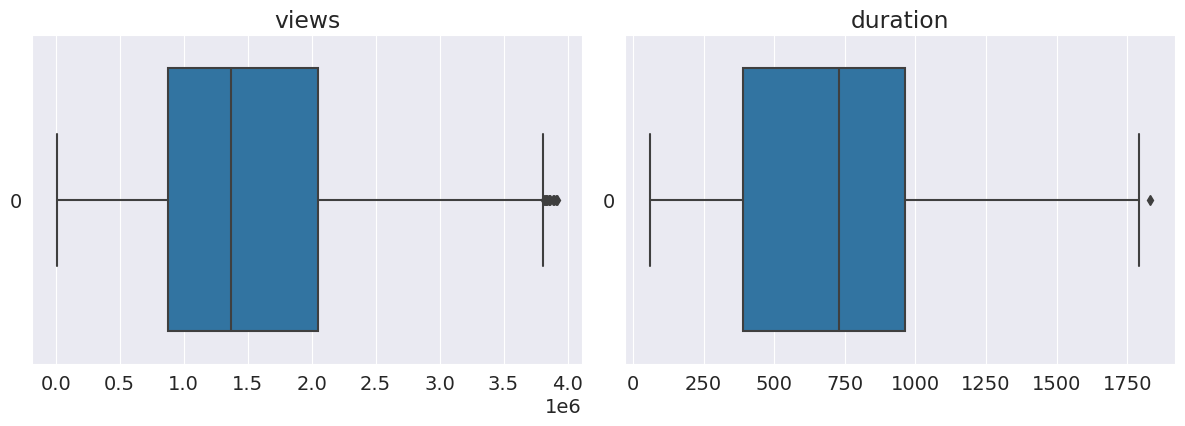

In [ ]:
#Box-plot after treating numerical columns
columns = ['views', 'duration']
plt.figure(figsize=(18,12))

for i, col in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(ted_newdf[col], orient ='h')
    plt.title(col)

plt.tight_layout()

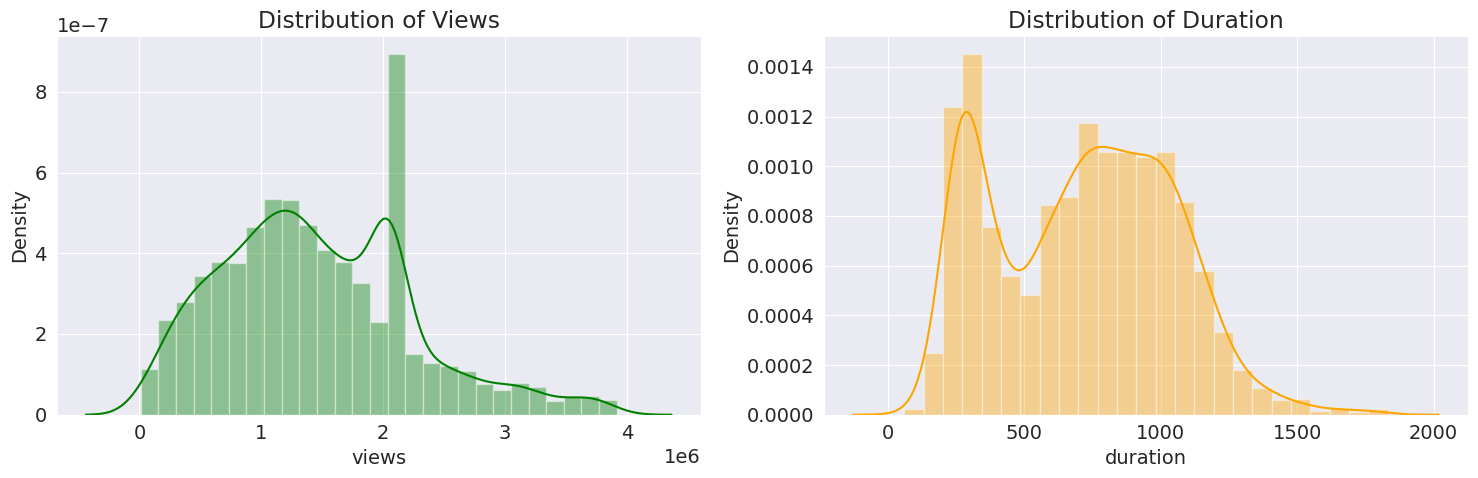

In [ ]:
#Final distribution plot after modification
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(ted_newdf['views'], color='green', ax=axs[0])
axs[0].set_title('Distribution of Views')

sns.distplot(ted_newdf['duration'], color='orange', ax=axs[1])
axs[1].set_title('Distribution of Duration')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

#### 2. What is/are the insight(s) found from the chart?
Answer: 
- Views column is little bit right skewed with normal distribution.
- Dusation column is bimodal type.

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

**Speaker**

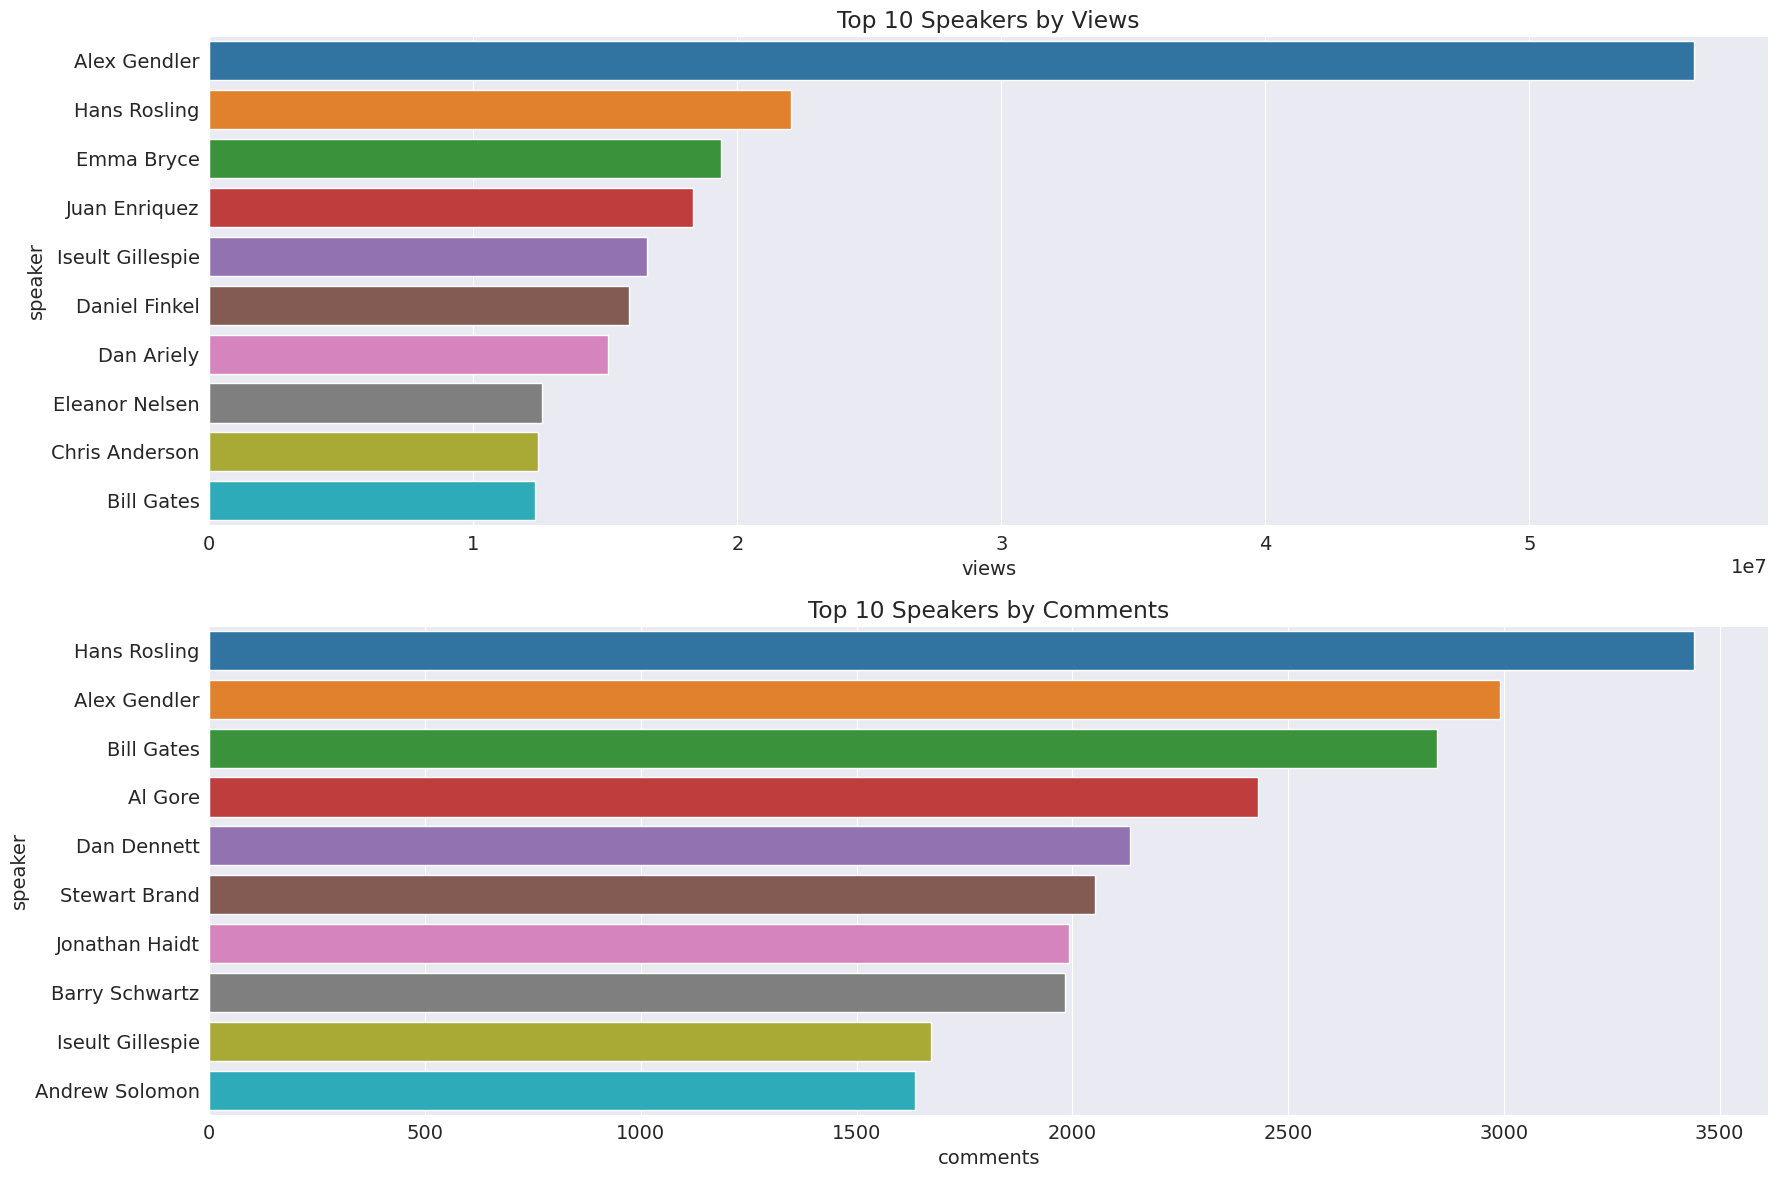

In [ ]:
# create a dataframe with top 10 speakers by views
top10_views = ted_newdf.groupby('speaker').views.sum().nlargest(10)
top10_views = top10_views.reset_index()

# create a dataframe with top 10 speakers by comments
top10_comments = ted_newdf.groupby('speaker').comments.sum().nlargest(10)
top10_comments = top10_comments.reset_index()

# create the figure and subplots
fig, axs = plt.subplots(2,1, figsize=(18,12))

# create a barplot with top 15 speakers by views
sns.barplot(x='views', y='speaker', data=top10_views, ax=axs[0])
axs[0].set_title('Top 10 Speakers by Views')

# create a barplot with top 15 speakers by comments
sns.barplot(x='comments', y='speaker', data=top10_comments, ax=axs[1])
axs[1].set_title('Top 10 Speakers by Comments')


plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

#### 2. What is/are the insight(s) found from the chart?
Answer:
- Alex Gendler is the most viewed speaker on the internet.
- Hans Rosling episode got the highest comments on the internet.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: The higher popularity of speaker on the show attracts more views and thus more money.

In [ ]:
#Creating a new column 'speaker_popularity' based on views on their episode
ted_newdf['speaker_popularity'] = ""
ted_newdf.loc[ted_newdf['views'] <= 500000, 'speaker_popularity'] = 'not_popular'
ted_newdf.loc[(ted_newdf['views'] > 500000) & (ted_newdf['views'] <= 1500000), 'speaker_popularity'] = 'avg_popular'
ted_newdf.loc[(ted_newdf['views'] > 1500000) & (ted_newdf['views'] <= 2500000), 'speaker_popularity'] = 'popular'
ted_newdf.loc[(ted_newdf['views'] > 2500000) & (ted_newdf['views'] <= 3500000), 'speaker_popularity'] = 'high_popular'
ted_newdf.loc[ted_newdf['views'] > 3500000, 'speaker_popularity'] = 'extreme_popular'

In [ ]:
#Checking dataset
ted_newdf.sample(2)

,talk_id,title,speaker,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,speaker_popularity
3274,24405,Can you solve the river crossing riddle?,Lisa Winer,{0: 'Lisa Winer'},none,none,2.051773e+06,2016-11-01,2019-03-01,TED-Ed,en,"['ar', 'bg', 'en', 'es', 'fa', 'fr', 'he', 'hu...",88.0,238.0,"['creativity', 'memory', 'water', 'rivers', 'T...",{17849: 'Can you solve the giant cat army ridd...,https://www.ted.com/talks/lisa_winer_can_you_s...,"As a wildfire rages through the grasslands, th...","As a wildfire rages through the grasslands, th...",popular
3465,38075,How your brain's executive function works -- a...,Sabine Doebel,{0: 'Sabine Doebel'},{0: ['cognitive scientist']},{0: 'Sabine Doebel studies the developing mind...,2.538094e+06,2018-12-01,2019-05-09,TEDxMileHigh,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'hu...",36.0,555.0,"['brain', 'cognitive science', 'children', 'ne...","{37760: ""How risk-taking changes a teenager's ...",https://www.ted.com/talks/sabine_doebel_how_yo...,You use your brain's executive function every ...,So I have a confession to make. I only recentl...,high_popular


<Axes: xlabel='speaker_popularity', ylabel='comments'>

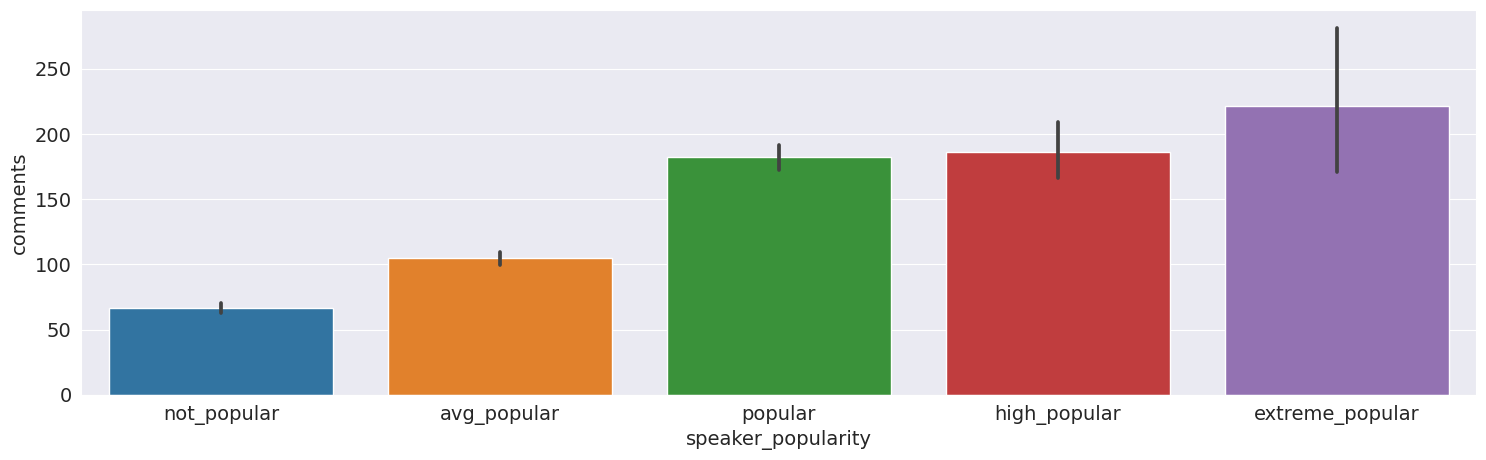

In [ ]:
#Making a bar-plot for speaker popularity
plt.figure(figsize=(18,5))
sns.barplot(data = ted_newdf ,x = 'speaker_popularity', y = 'comments', order=['not_popular', 'avg_popular', 'popular', 'high_popular', 'extreme_popular'])

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

#### 2. What is/are the insight(s) found from the chart?
Answer:
- The graph shows that speaker_popularity has a strong correlation with comments.
- As the number of comments keeps on increasing, the popularity of speaker is also increasing.
- The graph shows that the views on the episodes can be predictable based on the comments.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.
<br>
Answer: The least popular speaker will attracts less views and thus effect business negatively.

**Events**

In [ ]:
#The ted events are divided into many categories
print(ted_newdf['event'].value_counts().sample(10))

TEDMED 2017                 11
TEDxBinghamtonUniversity     2
TEDxAthens                   3
TEDxMonterey                 1
TEDActive 2015               1
TEDxDubai                    1
TEDGlobal 2017              53
TEDGlobal 2011              67
TED@Tommy                    5
TEDxOslo                     6
Name: event, dtype: int64


In [ ]:
#Dividing different types of ted_events into major categories
ted_categories = ['TED-Ed','TEDx', 'TED', 'TEDGlobal', 'TEDSummit', 'TEDWomen', 'TED Residency']


ted_newdf['TEDevent_type'] = ted_newdf['event'].map(lambda x: "TEDx" if x[0:4] == "TEDx" else x)
ted_newdf['TEDevent_type'] = ted_newdf['TEDevent_type'].map(lambda x: "TED-Ed" if x[0:4] == "TED_Ed" else x)
ted_newdf['TEDevent_type'] = ted_newdf['TEDevent_type'].map(lambda x: "TED" if x[0:4] == "TED2" else x)
ted_newdf['TEDevent_type'] = ted_newdf['TEDevent_type'].map(lambda x: "TEDGlobal" if x[0:4] == "TEDG" else x)
ted_newdf['TEDevent_type'] = ted_newdf['TEDevent_type'].map(lambda x: "TEDWomen" if x[0:4] == "TEDW" else x)
ted_newdf['TEDevent_type'] = ted_newdf['TEDevent_type'].map(lambda x: "TEDSummit" if x[0:4] == "TEDS" else x)
ted_newdf['TEDevent_type'] = ted_newdf['TEDevent_type'].map(lambda x: "TED Residency" if x[0:13] == "TED Residency" else x)
ted_newdf['TEDevent_type'] = ted_newdf['TEDevent_type'].map(lambda x: "Other TED" if x not in ted_categories else x)


In [ ]:
#Checking shows
pd.DataFrame(ted_newdf['TEDevent_type'].value_counts()).reset_index()

,index,TEDevent_type
0,TED,1160
1,TEDx,689
2,Other TED,677
3,TED-Ed,555
4,TEDGlobal,510
5,TEDWomen,194
6,TEDSummit,145
7,TED Residency,40


**Published Date**

In [ ]:
#Creating new column for date, year and month
ted_newdf['published_year'] = ted_newdf['published_date'].dt.year
ted_newdf['published_month'] = ted_newdf['published_date'].dt.month
ted_newdf['published_day'] = ted_newdf["published_date"].dt.day_name()

In [ ]:
# storing weekdays in order of numbers from 0 to 6 value

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}

# making new column holding information of day number

ted_newdf['published_daynumber'] = ted_newdf['published_day'].map(daydict)

In [ ]:
#Checking dataset
ted_newdf.sample(1)

,talk_id,title,speaker,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,speaker_popularity,available_languages,TEDevent_type,published_year,published_month,published_day,published_daynumber
42,67,How juries are fooled by statistics,Peter Donnelly,{0: 'Peter Donnelly'},{0: ['mathematician; statistician']},"{0: ""Peter Donnelly is an expert in probabilit...",1287967.0,2005-07-14,2006-11-08,TEDGlobal 2005,...,https://www.ted.com/talks/peter_donnelly_how_j...,Oxford mathematician Peter Donnelly reveals th...,"As other speakers have said, it's a rather dau...",avg_popular,135,TEDGlobal,2006,11,Wednesday,3


**TED_Topics**

In [ ]:
#Indentifying topics and grouping into rows
import ast
df = ted_newdf.copy()
df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x))
df = df.explode('topics')

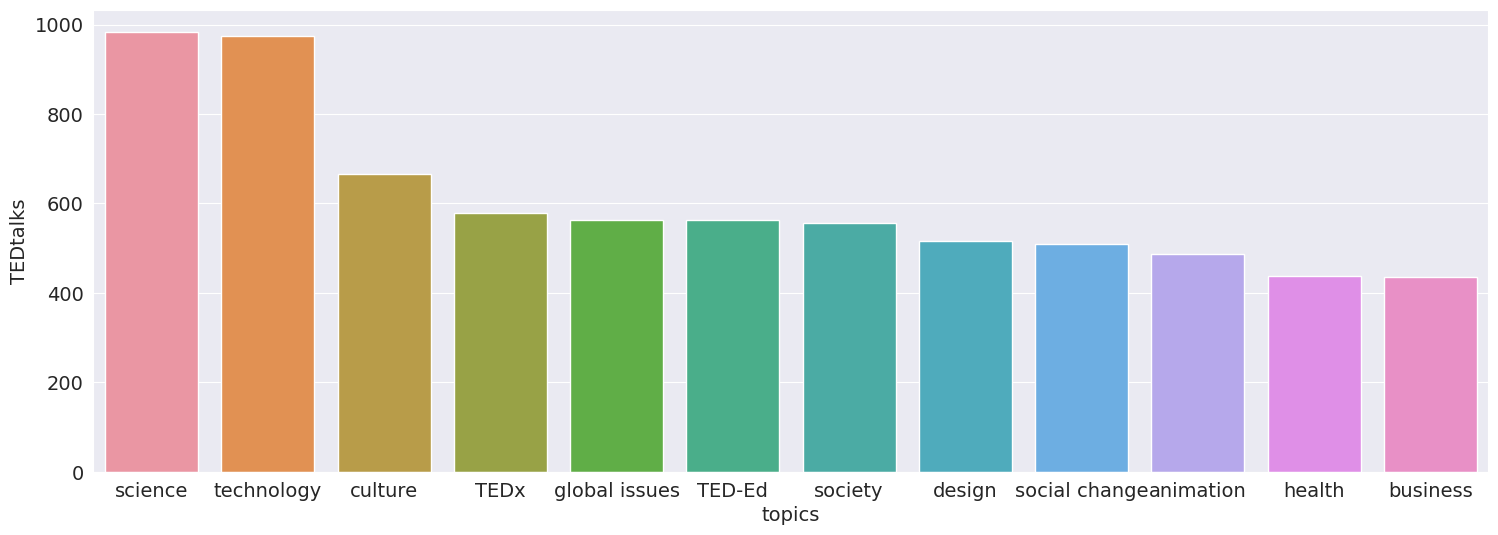

In [ ]:
#Creating dataframe for topics
popular_topic = pd.DataFrame(df['topics'].value_counts()).reset_index()
popular_topic.columns = ['topics', 'TEDtalks']

plt.figure(figsize=(18,6))
sns.barplot(x='topics', y='TEDtalks', data=popular_topic.head(12))
plt.show()

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

#### 2. What is/are the insight(s) found from the chart?
Answer: Science and technology is the most popular talk from all of the topics.

##### 3. Will the gained insights help creating a positive business impact? 
<br>
Answer: The high interested topic like science & tech. will effect business positively.

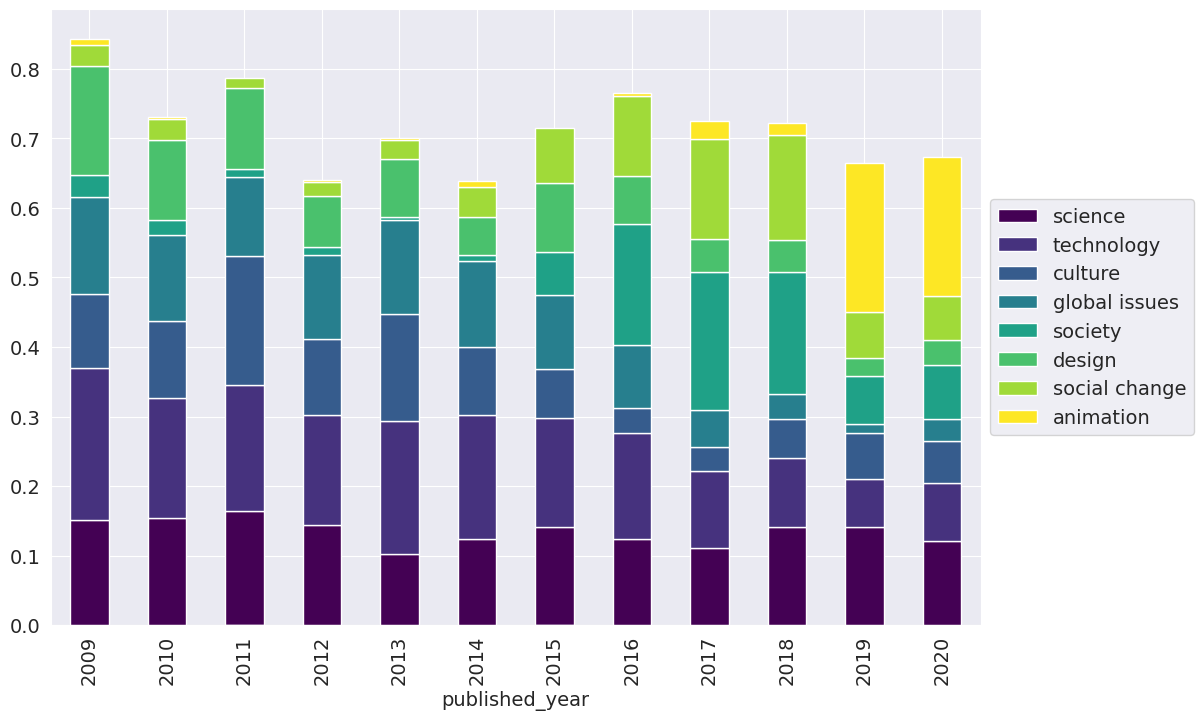

In [ ]:
#Plotting stacked bar charts for topics over the years
pop_theme_talks = df[(df['topics'].isin(popular_topic.head(12)['topics'])) & (df['topics'] != ('TEDx','TED-Ed'))]
pop_theme_talks['published_year'] = pop_theme_talks['published_year'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['published_year'] > 2008]


themes = list(popular_topic.head(10)['topics'])
themes.remove('TEDx')
themes.remove('TED-Ed')

ctab = pd.crosstab([pop_theme_talks['published_year']], pop_theme_talks['topics']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

##### 1. Why did you pick the specific chart?
Answer: I wanted to know the pattern or trends in the data.

#### 2. What is/are the insight(s) found from the chart?
Answer: 
- The science talks are constantly popular in every years.
- From 2018, animation talks are taking a big place and its percentage is higher in 2019 and 2020.

##### 3. Will the gained insights help creating a positive business impact? 
<br>
Answer: Yes, animation like topics from 2020 has been demand and has strength to attract more views on the show.

# **Feature Engineering & Data Pre-processing**

**Feature Selection**

In [ ]:
ted_newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   talk_id              3970 non-null   int32         
 1   title                3970 non-null   object        
 2   speaker              3970 non-null   object        
 3   all_speakers         3970 non-null   object        
 4   occupations          3970 non-null   object        
 5   about_speakers       3970 non-null   object        
 6   views                3970 non-null   float64       
 7   recorded_date        3969 non-null   datetime64[ns]
 8   published_date       3970 non-null   datetime64[ns]
 9   event                3970 non-null   object        
 10  native_lang          3970 non-null   object        
 11  available_lang       3970 non-null   object        
 12  comments             3970 non-null   float64       
 13  duration             3970 non-nul

In [ ]:
#Dropping unwanted columns
ted_newdf.drop(labels = ["transcript","description","related_talks","about_speakers","occupations","url","all_speakers","talk_id","speaker", "title", "recorded_date", "published_date", "event", "native_lang", "available_lang", "topics"], axis=1, inplace = True)

In [ ]:
#Checking dataset
ted_newdf.sample(1)

,views,comments,duration,speaker_popularity,available_languages,TEDevent_type,published_year,published_month,published_day,published_daynumber
3432,3854445.0,761.0,915.0,extreme_popular,165,TED,2019,4,Tuesday,2


In [ ]:
#Changing data type of columns
ted_newdf = ted_newdf.astype({'comments':'int64', 'views':'int64'})
ted_newdf = ted_newdf.astype({
    'speaker_popularity': 'category',
    'published_day': 'category',
    'TEDevent_type': 'category'
})

In [ ]:
#Checking data-type
ted_newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 4003
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   views                3970 non-null   int64   
 1   comments             3970 non-null   int64   
 2   duration             3970 non-null   float64 
 3   speaker_popularity   3970 non-null   category
 4   available_languages  3970 non-null   int64   
 5   TEDevent_type        3970 non-null   category
 6   published_year       3970 non-null   int64   
 7   published_month      3970 non-null   int64   
 8   published_day        3970 non-null   category
 9   published_daynumber  3970 non-null   int64   
dtypes: category(3), float64(1), int64(6)
memory usage: 389.7 KB


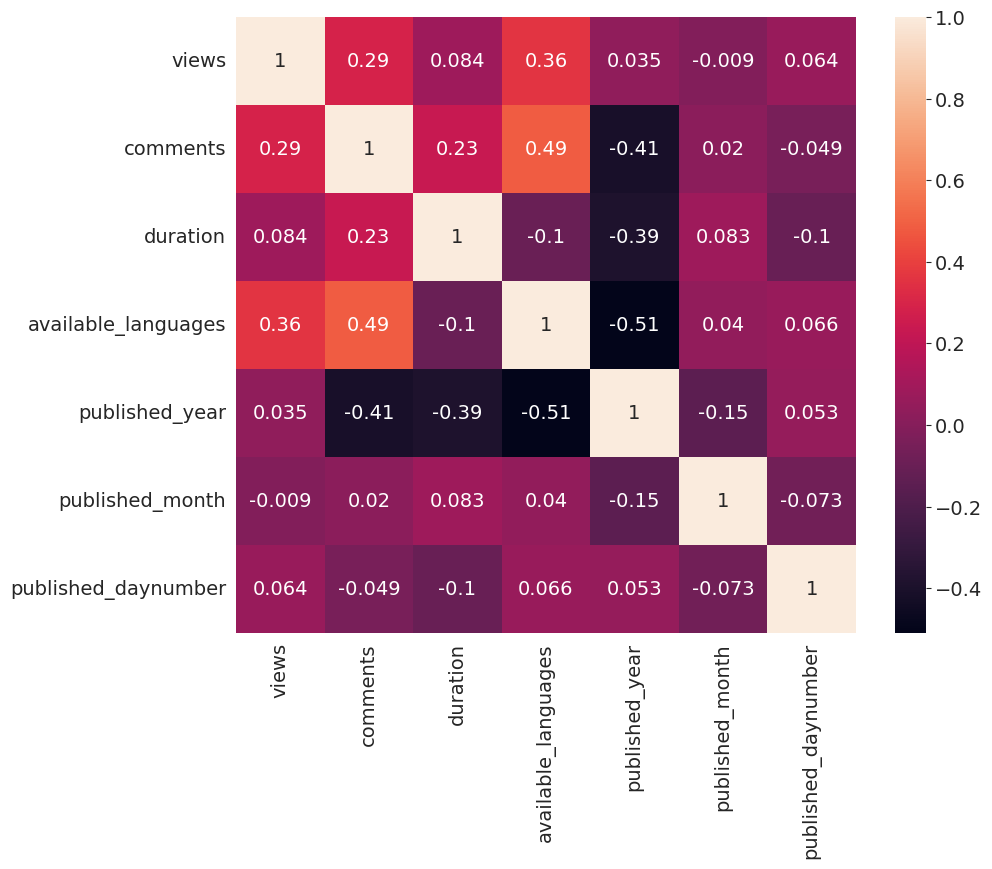

In [ ]:
#Correlation map
correlmap = ted_newdf.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax=ax)
plt.show()

#### 1. Why did you pick the specific chart?
Answer: The correlation chart display the correlation coefficients for different variables. It shows the mutual relation between different variables.

#### 2. What is/are the insight(s) found from the chart?
Answer: Comments and available_languages are the most correlated columns.


**Remove Multicollinearity**

In [ ]:
#Importing parameter
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Creating a dataframe having numerical columns
numerical_col = ted_newdf.select_dtypes(include=['int64','int32','float32','float64']).drop(['views'],axis=1)

#Calculating VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_col.values, i) for i in range(numerical_col.shape[1])]
vif["features"] = numerical_col.columns

#Print VIF
vif

,VIF Factor,features
0,2.605507,comments
1,6.467453,duration
2,13.508848,available_languages
3,24.234576,published_year
4,4.184871,published_month
5,5.361668,published_daynumber


**Observation:**
- available_languages and published_year have very high inflation factor.
- We can remove published_month and published_year as they are not much important columns for further analaysis.

1. What all feature selection methods have you used  and why?
<br>
Answer: Filter methods: Filter methods rank features based on their relevance to the target variable using statistical tests or correlation measures.

In [ ]:
#Dropping columns
ted_newdf.drop(['published_year','published_month'], axis=1, inplace=True)


##### 2. Which all features you found important and why?
Answer: comments, duration, available_languages, published_daynumber
- These features are important for any online shows as it directly effect the views on the video.

In [ ]:
#Calculating VIF again
numerical_col = ted_newdf.select_dtypes(include=['int64','int32','float32','float64']).drop(['views'],axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_col.values, i) for i in range(numerical_col.shape[1])]
vif["features"] = numerical_col.columns

# print the results
vif

,VIF Factor,features
0,2.383419,comments
1,3.886106,duration
2,6.844579,available_languages
3,4.338249,published_daynumber


###  Data Transformation

In [ ]:
#Using power transform for views column
pt = PowerTransformer()
ted_newdf['views'] = pt.fit_transform(pd.DataFrame(ted_newdf['views']))

### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
Answer: A power transform will make the probability distribution of a variable more Gaussian. So, we have applied on target variable and checked the skewness of data columns.

In [ ]:
#Checking skewness
ted_newdf.skew()

views                 -0.059045
comments               2.779550
duration               0.143467
available_languages    0.102257
published_daynumber   -0.025308
dtype: float64

- Skewness of data has decreased and comes cloes to zero.

<u> **Model Implementation and Pre-processing**

###  Data Splitting

In [ ]:
#Data splitting into train and test
X = ted_newdf.drop(columns=['views'])
y = ted_newdf['views']

In [ ]:
#Checking independent variable
X

,comments,duration,speaker_popularity,available_languages,TEDevent_type,published_day,published_daynumber
0,272,977.0,extreme_popular,270,TED,Tuesday,2
1,628,1190.0,popular,303,TED,Tuesday,2
2,124,1286.0,popular,165,TED,Tuesday,2
3,219,1116.0,high_popular,219,TED,Tuesday,2
5,48,1198.0,avg_popular,123,TED,Monday,1
...,...,...,...,...,...,...,...
3999,37,941.0,avg_popular,27,TED,Friday,5
4000,6,690.0,avg_popular,6,TED,Monday,1
4001,88,346.0,not_popular,27,TED-Ed,Monday,1
4002,9,774.0,not_popular,6,TEDx,Tuesday,2


In [ ]:
#Checking dependent variable
y

0       2.210515
1       0.796459
2       0.653858
3       1.421228
5      -0.201608
          ...   
3999   -0.844023
4000   -1.283922
4001   -1.681121
4002   -1.356506
4003   -2.408524
Name: views, Length: 3970, dtype: float64

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

##### What data splitting ratio have you used and why? 
Answer: The data is split into 80:20 ratio as pareto principle rule suggests that 80% of the predictive power can be achieved with 20% of the data.

In [ ]:
#Split sizes
print(X_train.shape)
print(X_test.shape)

(3176, 7)
(794, 7)


<u>**Data-Preprocessing (Making pipeline using Column Transformer)**

###  Data Scaling

In [ ]:
#Column transformer 
step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),[0,1,3,]),
    ('col_tnf1', PowerTransformer(),[0,1,3]),
    ('col_tnf2', OneHotEncoder(sparse=False, drop='first'),[4,5]),
    ('col_tnf3', OrdinalEncoder(categories=[['not_popular','avg_popular','popular','high_popular','extreme_popular']]),[2])
],remainder='passthrough')

##### Which method have you used to scale you data and why?
Answer: Standard scaler is a preprocessing technique that is commonly used in machine learning to standardize or normalize the features of a dataset. 

In [ ]:
# display pipeline
from sklearn import set_config
set_config(display='diagram')

**Observation:**
- Pipelines chains together multiple steps so that the output of each step is used as input for the next step.
- Here, we are making pipeline using column transformer.
</br> **Steps added:**
- Standard Scaler: Scaling values to a standard range.
- PowerTransformer: Make the probability distribution of a variable more Gaussian.
- OneHotEncoder: Assign numerical values to the categorical values.
- OrdinalEncoder: Each unique category value is assigned an integer value.

# **ML Model Implementation**

**Linear Regression**
<br>Linear Regression is a supervised machine learning algorithm that shows the linear relationship between predictor/independent variable and dependent/target variable. The relationship is defined by using the best fit line between predictor and target variable.
There are two types of linear regression models:

1. Simple Regression: It involves just two variables - one dependent variable(y) and one independent variable(x).
2. Multivariable Regression: It is used when there are multiple independent variables that can be used to predict a single dependent variable.

In [ ]:
# Applying LinearRegression algorithm as step2
step2 = LinearRegression()

# Making pipeline
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# Fitting the pipeline on training dataset
pipe1.fit(X_train,y_train)

# Predict the train and test dataset 
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# Displaying pipeline diagram
display(pipe1)

# LinearRegression model all output scores

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2', LinearRegression())])

In [ ]:
# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
R2 score 0.8876318356232163
Adjusted R2 score 0.8873835473812222


Testing data R2 and Adjusted R2 Score
R2 score 0.8883753904926731
Adjusted R2 score 0.8873812781942618


The performance metrics
MAE 0.27796484977055863
MSE 0.11530000614583492
RMSE 0.3395585459767357


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: Linear regression analysis is used to predict the value of a variable based on the value of another variable.
A slight difference in the training and testing data accuracy can be seen.

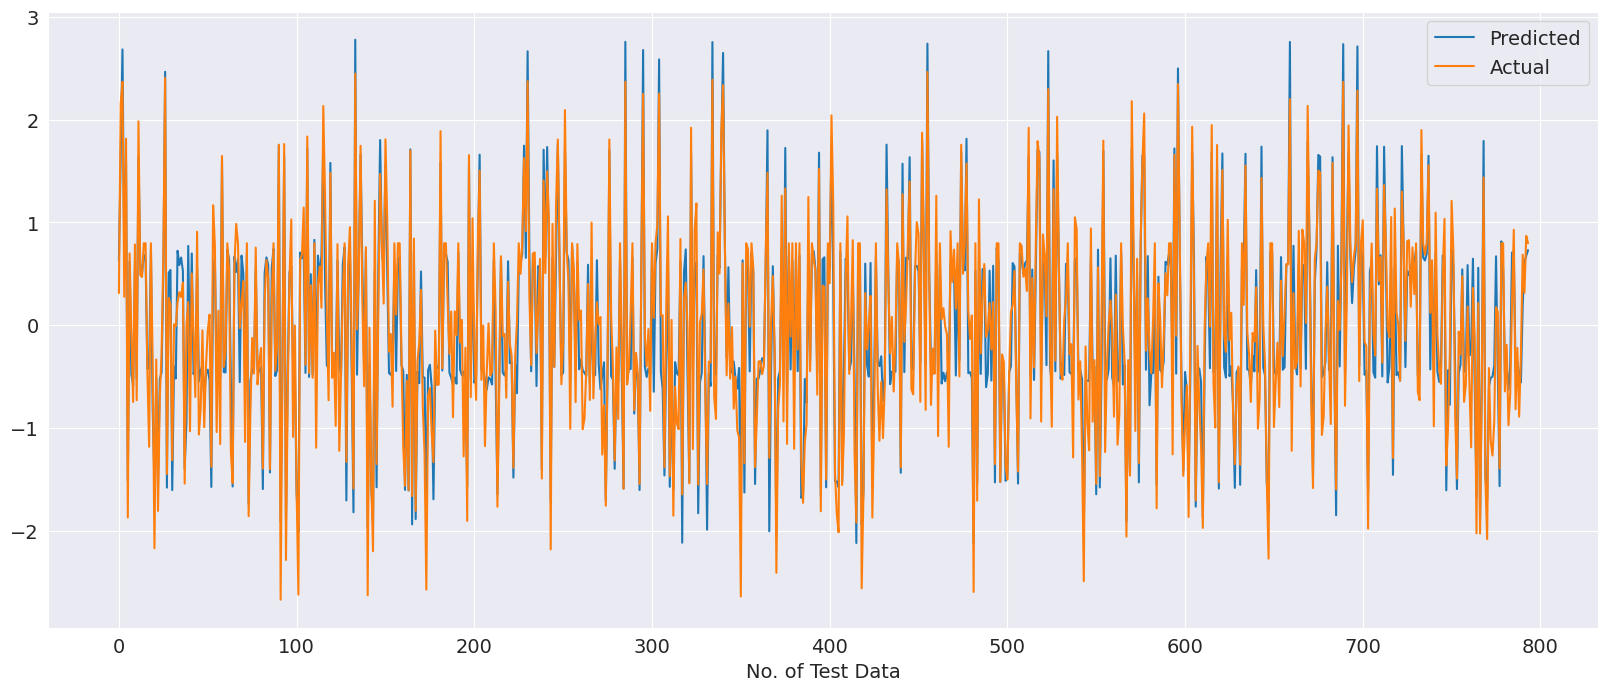

In [ ]:
#plotting graph
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

**Ridge Regression(L2) with Hyperparameter Tuning**

Ridge regression is used to reduce overfitting case by appying some extra penalty terms in the linear regression equation. The penalty term is equal to the square of the the coefficient multiplied by lambda. Here, lambda is the hyperparameter. It can range from 0 to infinity.
<br>
<br>Ridge Regression prevents multicollinearity by shrinking the parameters. Thus it also leads to coefficient shrinkage. 

In [ ]:
# Applying RidgeRegression algorithm with hyperparameter tuning as step2

#Giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

#Applying Gridsearch CV to find best hyperparameter
Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10) 
step2 = Reg_ridge

#Making Pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
## Fitting the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# Showing pipeline diagram
display(pipe2)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

In [ ]:
# Ridge Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print("The best parameters is", Reg_ridge.best_params_)
print('cross-validation score', Reg_ridge.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
R2 score 0.8876293956503053
Adjusted R2 score 0.8873811020169569


Testing data R2 and Adjusted R2 Score
R2 score 0.8883571291324313
Adjusted R2 score 0.8873628542010407


Cross-validation score and best params
The best parameters is {'alpha': 0.001}
cross-validation score 0.8850606083378905


The performance metrics
MAE 0.27796861135320394
MSE 0.11531886878694426
RMSE 0.33958632008216155


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: Ridge regression is normally used when there is high multi-collinearity.
The evaluation metrics shows slight improvement in the testing data as compared as to the training data.

#####  Which hyperparameter optimization technique have you used and why?
Answer: We have used cross-validation as hyperparameter optimization.
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. 

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: A slight improvement from linear regression. 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.
Answer: Improved predictive accuracy: Ridge regression can help to improve the accuracy of predictive models, especially when dealing with high-dimensional datasets with correlated features.

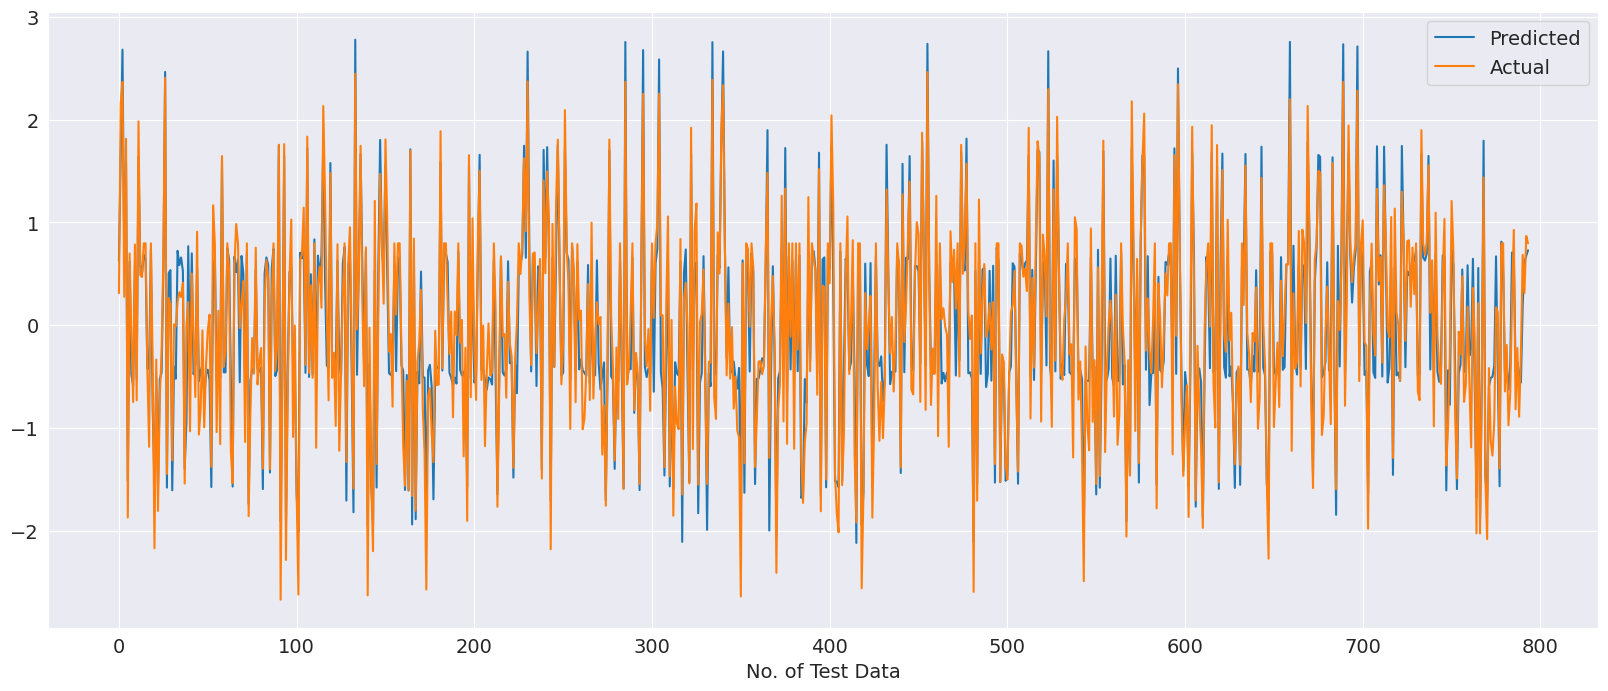

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

**Lasso Regression(L1) with Hyperparameter Tuning**
<br>Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It also add penalty to the loss function only absolute sum of coefficient.<br> The most peculiar feature of lasso regression is that as you increase lambda value the coefficient values comes to zero which is not possible in ridge regression. Therefore, Lasso regression helps in feature selection. 

In [ ]:
#Applying Lasso Regression with hyperparameter tuning as step2

#Giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

#Using GridsearchCV
Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)
step2 = Reg_Lasso

#Making pipeline
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
# Fitting the pipeline on training dataset
pipe3.fit(X_train,y_train)

# Predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

In [ ]:
# Output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
R2 score 0.886575285243255
Adjusted R2 score 0.8863246624518102


Testing data R2 and Adjusted R2 Score
R2 score 0.886882430050432
Adjusted R2 score 0.8858750216666572


Cross-validation score and best params
The best parameters is {'alpha': 1e-08}
cross-validation score 0.8841708290618415


The performance metrics
MAE 0.27964841673558527
MSE 0.11684212440206569
RMSE 0.3418217728613344


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: Lasso regression performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.
The training and testing data accuracy is very close to each other.

##### Which hyperparameter optimization technique have you used and why?
Answer: We have used cross-validation as hyperparameter optimization.
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. 

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: Yes,the performance metrics are lower in lasso regression as comapred to linear and ridge regression.

####  3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.
Answer:Improved feature selection: Lasso regression can help identify the most important features in a dataset and set the coefficients of less important features to zero, effectively performing feature selection.

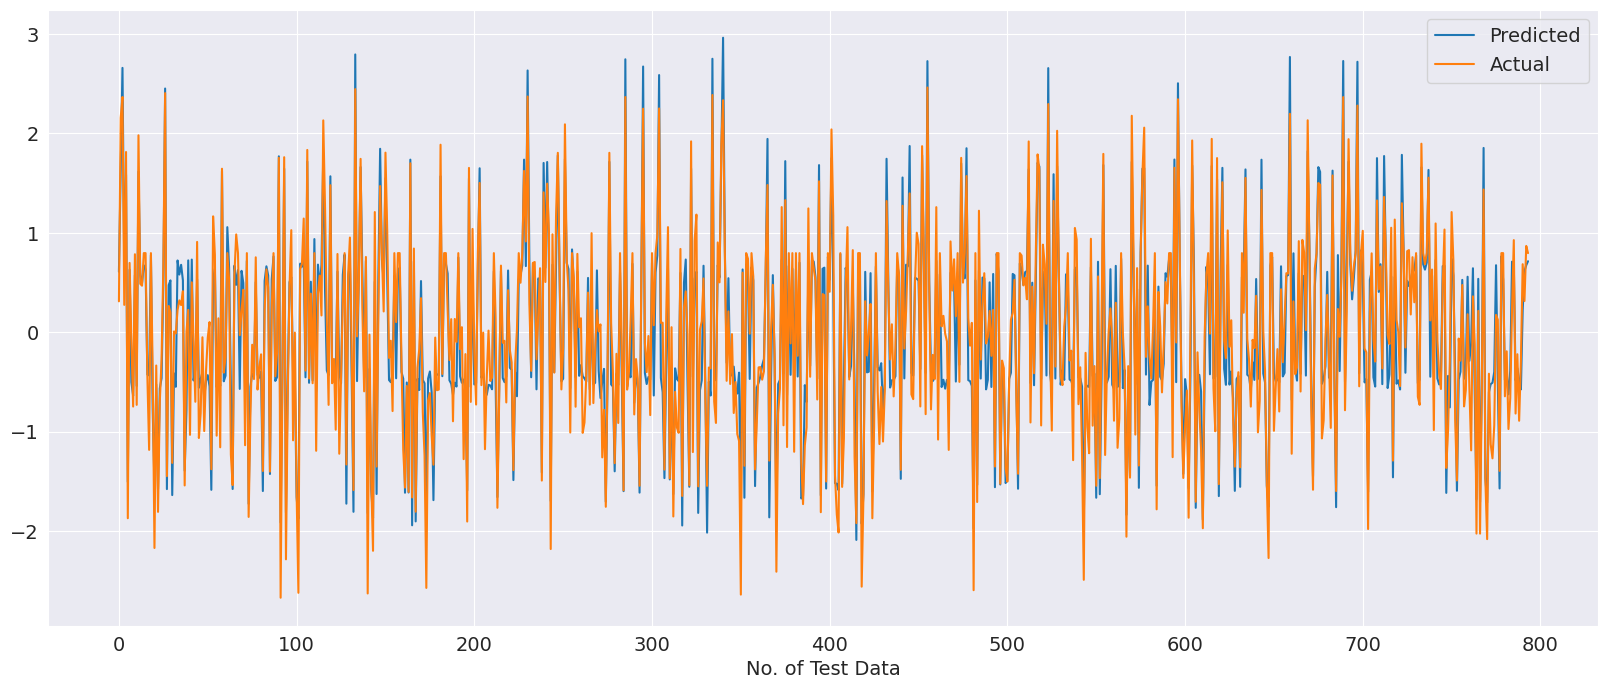

In [ ]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

**Decision Tree Regressor with Hyperparameter**
<br>Decision trees is used for both classification and regression purpose. It forms a flowchart like tree structure that is divided into root node, branches, internal node and leaf(terminal) node.
<br>Practically speaking, decision trees are nothing but a giant structure of nested if-else condition.

In [ ]:
#Applying decision tree algorithm

# Giving parameters
parameters = {
    'criterion':['squared_error'],     # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],              # random
    'max_depth' :[6],                  #4,5,6,7,8,9,None
    'max_features' :[1.0]              #0.25,0.50,0.75,0.85
}
#GridsearchCV
dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)
step2 = dtr

#Making pipeline
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

#Fitting pipeline on training dataset
pipe4.fit(X_train,y_train)

#Prodicting the train and test dataset 
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

#Displaying pipeline diagram
display(pipe4)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [6],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

In [ ]:
# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
R2 score 0.9074922532210317
Adjusted R2 score 0.9072878484775175


Testing data R2 and Adjusted R2 Score
R2 score 0.8925259571094859
Adjusted R2 score 0.8915688091448121


Cross-validation score and best params
The best parameters is {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.8922849590357161


The performance metrics
MAE 0.26544177776608013
MSE 0.11101277630879972
RMSE 0.33318579848006685


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: Decision tree builds regression or classification models in the form of a tree structure.
It is working effectively on training dataset but lower accuracy on training. It probably due to overtfitting.

##### Which hyperparameter optimization technique have you used and why?
Answer: We have used cross-validation as hyperparameter optimization.
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. 

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: It is showing improvement but due to overfitting case.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.
Answer:Improved interpretability: Decision trees are highly interpretable models, which means that they can be easily understood and explained to non-technical stakeholders.

**Random Forest Regressor**
<br>Random Forest is widely used in classification and regression analysis. It is the combination of many decision trees which generated their final output by majority vote.
<br> It uses the bagging technique and provides much better result than some of the models like simple linear regression.

In [ ]:
#Applying Random Forest Regressor

# Giving parameters
parameters = {
    'n_estimators':[58],      # 50,55,60,70,80,90,100
    'max_depth' :[6],         # 4,5,6,7,8,9,None
    'max_features' :[None],   # 'sqrt','log2'
    'max_samples' :[0.85]     # 0.40,0.50,0.60,0.70,0.75,0.85,1.0
}

#Applying GridSearchCV
rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)
step2 = rfr

#Making pipeline
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)
# predict the train and test dataset 
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 3]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 3]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['not_popular',
                                                                              'avg_popular',
                                                                              'popular',
                                                                              'high_popular',
                                                                              'extreme_popular']]),
                                                  [2])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [6],
                                          'max_features': [None],
                                          'max_samples': [0.85],
                                          'n_estimators': [58]}))])

In [ ]:
# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Training data R2 and Adjusted R2 Score
R2 score 0.910887555682583
Adjusted R2 score 0.9106906531856694


Testing data R2 and Adjusted R2 Score
R2 score 0.8978888197526109
Adjusted R2 score 0.8969794326511711


Cross-validation score and best params
The best parameters is {'max_depth': 6, 'max_features': None, 'max_samples': 0.85, 'n_estimators': 58}
cross-validation score 0.8973351289180037


The performance metrics
MAE 0.261329000273805
MSE 0.10547333390052871
RMSE 0.32476658371902845


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Answer: Random Forest builds regression or classification models in the form of a multiple decision tree structure.
It works effectively on both training and test dataset.

##### Which hyperparameter optimization technique have you used and why?
Answer: We have used cross-validation as hyperparameter optimization.
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

##### 2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer: Yes, the performance metrics are low and accuracy percentage is also higher.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.
Answer: Improved prediction accuracy: Random forests can help businesses make more accurate predictions in various areas such as customer behavior, demand forecasting, fraud detection, and risk management. 

##### 1. Which ML model did you choose from the above created models as your final prediction model and why?
Answer: Random Forest is chosen as the final prediction model as it has good R2 scores and lower error metrics.

### 2.. Explain the model which you have used and the feature importance using any model explainability tool?
Answer: <br>Random Forest is widely used in classification and regression analysis. It is the combination of many decision trees which generated their final output by majority vote.
<br> It uses the bagging technique and provides much better result than some of the models like simple linear regression.

**Conclusion:**
- After evaluating different regression models, we found that Random Forest Regressor performs the best with higher R2 scores, lower error metrics, and can generalize well on unseen data.

- Ridge regression has shown higher R2 scores than Lasso. This happens because of the fact that lasso handles overfitting much better than ridge regression.

- The decision tree models has lower R2 score than other models. It also show overfitting case due to high difference in tarin and test accuracy.


- Random Forest can handle non-linear relationship betwwen feature and target variable. Also, it handles the problem of overfitting easily.

# ***Random Forest***:
**Training data R2 and Adjusted R2 Score**
<br>
R2 score: 0.9108103484061638
<br>
Adjusted R2 score: 0.9106132753123644


**Testing data R2 and Adjusted R2 Score**
<br>
R2 score: 0.8977958924831435
<br>
Adjusted R2 score: 0.8968856777851563



**The performance metrics**:
<br>
MAE: 0.26118842716892743
<br>
MSE: 0.10556932093052145
<br>
RMSE: 0.32491432860143526